<a href="https://colab.research.google.com/github/GPaz027/Cariety-ML/blob/develop/cariety.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cariety

Este notebook crea un clasificador de imágenes para alimentos utilizando TensorFlow y TensorFlow Hub.

## 1. Problema

* Detectar si la imagen de un alimento se encuentra en especificación o no (es consumible o no).


# 0. Settings iniciales

In [85]:
import tensorflow as tf
import tensorflow_hub as hub
import pandas as pd
import numpy as np
from IPython.display import Image

In [ ]:
print("TF Version:", tf.__version__)
print("TF Hub Version:", hub.__version__)

TF Version: 2.12.0
TF Hub Version: 0.14.0


# 1. Preparación de los datos

En esta etapa se convertirán las imágenes a arreglos de NumPy para permitir su preprocesamiento.

* Cantidad total de imágenes en el dataset: 3747
* Cantidad de imágenes de train + validation: 3060
* Cantidad de imágenes de test: 687 (343 y 344 respectivamente)


In [ ]:
import os

bad_path = "drive/MyDrive/Cariety/images/train/bad/"
bad_images = [fname for fname in os.listdir(bad_path)]
bad_images[:10]

['IMG_8131.JPG',
 'IMG_8159.JPG',
 'IMG_8160.JPG',
 'IMG_8162.JPG',
 'IMG_8163.JPG',
 'IMG_8161.JPG',
 'IMG_8164.JPG',
 'IMG_8157.JPG',
 'IMG_8158.JPG',
 'IMG_8155.JPG']

In [ ]:
bad_df = pd.DataFrame({"id": bad_images, "spec": "bad"})
bad_df

,id,spec
0,IMG_8131.JPG,bad
1,IMG_8159.JPG,bad
2,IMG_8160.JPG,bad
3,IMG_8162.JPG,bad
4,IMG_8163.JPG,bad
...,...,...
1531,RottenApple (734).jpg,bad
1532,RottenApple (733).jpg,bad
1533,RottenApple (735).jpg,bad
1534,RottenApple (736).jpg,bad


In [ ]:
len(bad_df)

1536

In [ ]:
test = bad_df[:1490]

In [ ]:
len(test)

1490

In [ ]:
bad_df.to_csv("drive/MyDrive/Cariety/images/train/bad_labels.csv", index=False)

In [ ]:
good_path = "drive/MyDrive/Cariety/images/train/good/"
good_images = [fname for fname in os.listdir(good_path)]
good_images[:10]

['20190809_115823.jpg',
 '20190809_115834.jpg',
 '20190809_115847.jpg',
 '20190809_115815.jpg',
 '20190809_115805.jpg',
 '20190809_115758.jpg',
 '20190809_115752.jpg',
 '20190809_115648.jpg',
 '20190809_115733.jpg',
 '20190809_115640.jpg']

In [ ]:
good_df = pd.DataFrame({"id": good_images, "spec": "good"})
good_df

,id,spec
0,20190809_115823.jpg,good
1,20190809_115834.jpg,good
2,20190809_115847.jpg,good
3,20190809_115815.jpg,good
4,20190809_115805.jpg,good
...,...,...
1519,IMG20200728174440_01.jpg,good
1520,IMG20200728174449.jpg,good
1521,IMG20200728174451.jpg,good
1522,IMG20200728174452.jpg,good


In [ ]:
good_df.to_csv("drive/MyDrive/Cariety/images/train/good_labels.csv", index=False)

In [ ]:
# Concatenar ambos DataFrames en uno solo

concat_labels = bad_df.append(good_df, ignore_index=False, verify_integrity=False, sort=None);
len(concat_labels)

<ipython-input-33-6c44e1737f62>:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_labels = bad_df.append(good_df, ignore_index=False, verify_integrity=False, sort=None);
<ipython-input-33-6c44e1737f62>:3: FutureWarning: Passing non boolean values for sort is deprecated and will error in a future version!
  concat_labels = bad_df.append(good_df, ignore_index=False, verify_integrity=False, sort=None);


3060

In [ ]:
concat_labels.to_csv("drive/MyDrive/Cariety/images/train/concat_labels.csv", index=False)

In [86]:
concat_labels = pd.read_csv("drive/MyDrive/Cariety/images/train/concat_labels.csv")

In [87]:
len(concat_labels)

3060

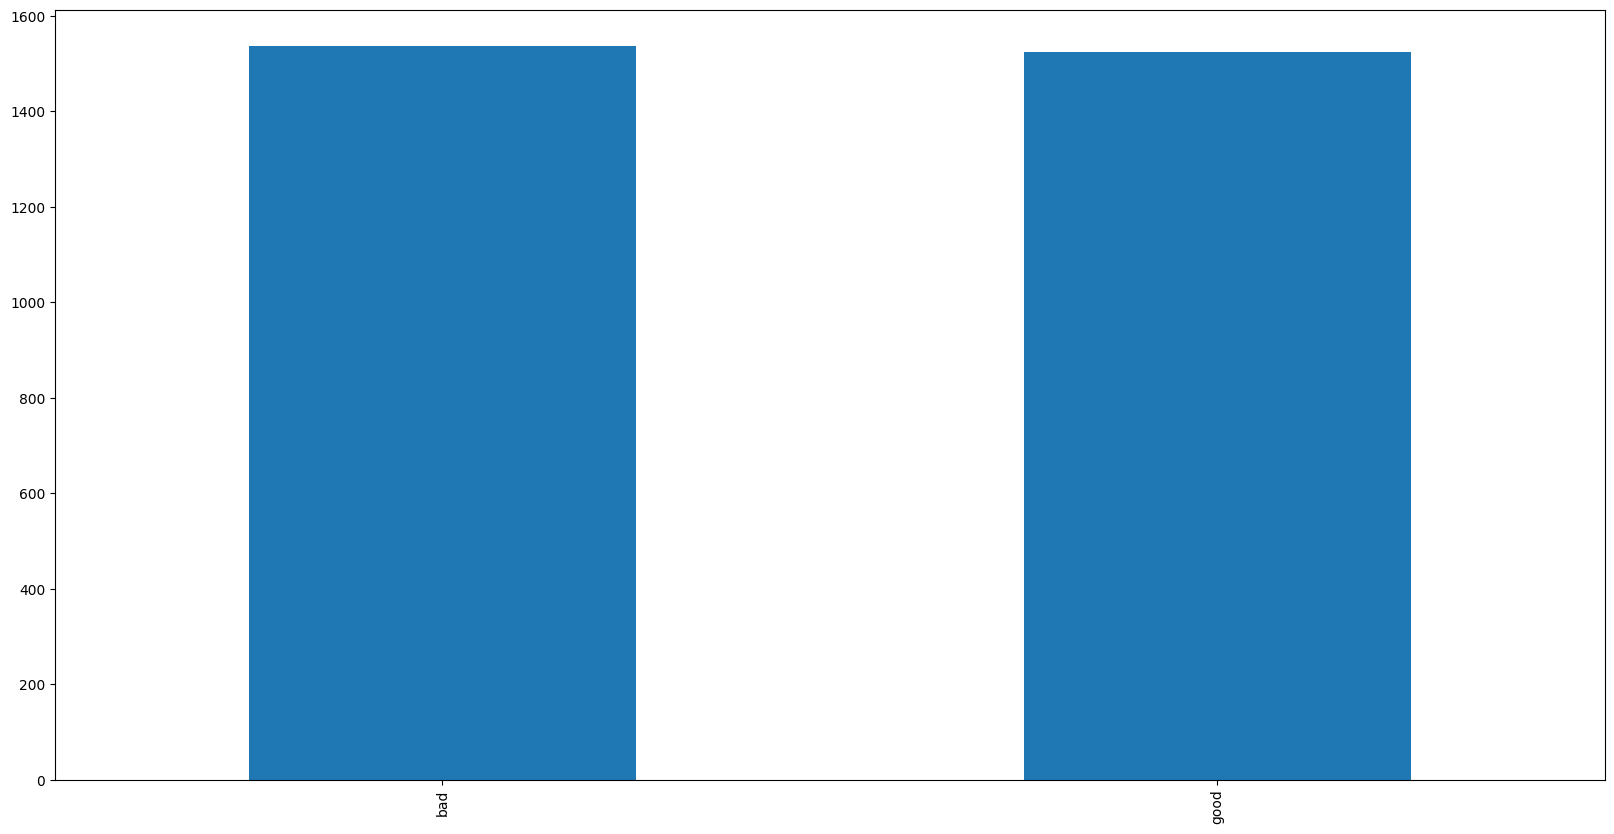

In [88]:
# Imágenes por label

concat_labels.spec.value_counts().plot.bar(figsize=(20, 10));

In [89]:
# Crear pathnames a partir de los ID de las imágenes y sus especificaciones (good/bad)

filenames = []

for index, rows in concat_labels.iterrows():
  if rows.spec == "bad":
    filenames.append("drive/MyDrive/Cariety/images/train/bad/" + rows.id)
  else:
    filenames.append("drive/MyDrive/Cariety/images/train/good/" + rows.id)
filenames[:10]

['drive/MyDrive/Cariety/images/train/bad/IMG_8131.JPG',
 'drive/MyDrive/Cariety/images/train/bad/IMG_8159.JPG',
 'drive/MyDrive/Cariety/images/train/bad/IMG_8160.JPG',
 'drive/MyDrive/Cariety/images/train/bad/IMG_8162.JPG',
 'drive/MyDrive/Cariety/images/train/bad/IMG_8163.JPG',
 'drive/MyDrive/Cariety/images/train/bad/IMG_8161.JPG',
 'drive/MyDrive/Cariety/images/train/bad/IMG_8164.JPG',
 'drive/MyDrive/Cariety/images/train/bad/IMG_8157.JPG',
 'drive/MyDrive/Cariety/images/train/bad/IMG_8158.JPG',
 'drive/MyDrive/Cariety/images/train/bad/IMG_8155.JPG']

In [90]:
# Validación de las manipulaciones anteriores

if (len(os.listdir("drive/MyDrive/Cariety/images/train/bad/")) + len(os.listdir("drive/MyDrive/Cariety/images/train/good/"))) == len(filenames):
  print("Filenames es igual al total de las imágenes del training set")
else:
  print("Filenames no es igual al total de las imágenes del training set")

Filenames es igual al total de las imágenes del training set


In [91]:
labels = concat_labels.spec
labels = np.array(labels)
len(labels)

3060

In [92]:
if len(labels) == len(filenames):
  print("La cantidad de archivos es igual a la cantidad de labels")
else:
  print("La cantidad de archivos es distinta de la cantidad de labels")

La cantidad de archivos es igual a la cantidad de labels


In [93]:
# Obtener labels únicas (good/bad)

unique_labels = np.unique(labels)
unique_labels

array(['bad', 'good'], dtype=object)

In [94]:
# Para cada label, se convierte su valor en un boolean array

boolean_labels = [label == unique_labels for label in labels]
boolean_labels[:2]

[array([ True, False]), array([ True, False])]

In [95]:
len(boolean_labels)

3060

## Creación del dataset de validación

* Se partirá el dataset de entrenamiento en dos para poder contar con un dataset de validación.

In [96]:
# Setup X & y

X = filenames
y = boolean_labels

In [97]:
# Número de imágenes para experimentación

NUM_IMAGES = 1000 #@param {type:"slider", min:1000, max:4000, step:1000}

In [98]:
# Splitear imágenes en sets de training y validation

from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X[:NUM_IMAGES], y[:NUM_IMAGES], test_size=0.2, random_state=13)

len(X_train), len(y_train), len(X_val), len(y_val)

(800, 800, 200, 200)

## Preprocesamiento de las imágenes

In [100]:
# Definir tamaño de imagen (depende del modelo a utilizar)

IMG_SIZE = 224

def preprocess_image(img_path, img_size=IMG_SIZE):
  """
  Recibe un path de una imagen y convierte a la misma en un Tensor.
  """

  image = tf.io.read_file(img_path)

  image = tf.image.decode_jpeg(image, channels=3) # 3 canales para RGB

  image = tf.image.convert_image_dtype(image, tf.float32) # Convertir el color channel de 0-255 a 0-1 conservando la equivalencia (normalización)

  image = tf.image.resize(image, size=[img_size, img_size]) # Convertir la imagen a la resolución utilizada por el modelo

  return image